In [1]:
import sys
import os
from pathlib import Path

# Automatically find the project root (assumes "src" is in the project)
current_file = Path(__file__).resolve() if '__file__' in locals() else Path.cwd()
project_root = current_file
while not (project_root / "src").exists() and project_root != project_root.parent:
    project_root = project_root.parent

# Ensure we found the correct project root
if not (project_root / "src").exists():
    raise FileNotFoundError("Could not find project root containing 'src' directory.")

# Set the working directory to the project root
os.chdir(project_root)
from src.compression.mps_ND import NDMPS
import numpy as np
import matplotlib.pyplot as plt
from src.compression.utils_ND import *
import src.compression.utils_ND as ut
import src.evaluation.benchmark as benchmark

/home/miros/.pyenv/versions/3.10.15/envs/4T/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:54: UserWarning: Couldn't find `optuna`, `cmaes`, or `nevergrad` so will use completely random sampling in place of hyper-optimization.
  warnings.warn(
/home/miros/.pyenv/versions/3.10.15/envs/4T/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:36: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(
/home/miros/.pyenv/versions/3.10.15/envs/4T/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:73: UserWarning: Couldn't find `optuna`, `cmaes`, or `nevergrad` so will use completely random sampling in place of hyper-optimization.
  warnings.warn(


In [2]:
data_dir = '/home/miros/img-compression-mps/Data/pedestrians'
for file in sorted(os.listdir(data_dir)):
    if file.endswith('.npz'):
        path = os.path.join(data_dir, file)
        data = np.load(path)['sequence']
        break

(158, 238)


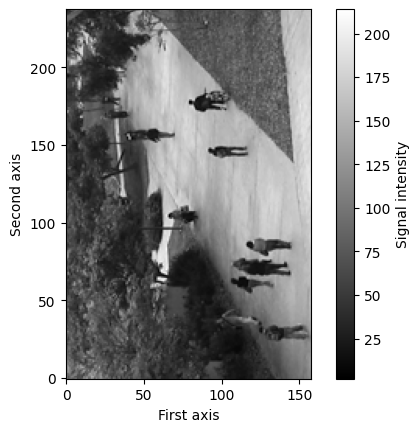

In [3]:
mid_slice_x = data[80, :, :]
print(mid_slice_x.shape)
# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [5]:
files = ['/home/miros/img-compression-mps/Data/pedestrians/seq_00000.npz', '/home/miros/img-compression-mps/Data/pedestrians/seq_00001.npz']
data_list, bitsize_list = benchmark.load_tensors(files=files, ending='.npz')

Loading file 1/2
Loading file 2/2


In [6]:
print(bitsize_list)

[8, 8]
